<a href="https://colab.research.google.com/github/UW-CTRL/AA548-spr2024/blob/main/homework/hw2_problem4_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp


In [21]:
dt = 0.1
goal_state = np.zeros(4)
initial_state = np.array([-4, 0., -1., 2.])
u_max = 2.

### put your code here ###

A_dynamics = np.array([[1., 0., dt, 0.],
                        [0., 1., 0., dt],
                        [0., 0., 1., 0.],
                        [0., 0., 0., 1.]])

B_dynamics = np.array([[dt**2, 0.],
                        [0., dt**2],
                        [1., 0.],
                        [0., 1.]])




T = 50  # time steps
n = 4   # state dimension
m = 2   # control dimension

us = cp.Variable([T,m])   # optimization variable.
xs = cp.Variable([T,n]) 

goal_state = np.zeros(n)
# quadratic cost matrices
Q = np.diag([1., 1., 1., 1.])
R = np.diag([1., 1.])


objective =  0
constraints = []


state = initial_state
constraints += [xs[0] == initial_state]
for t in range(T):
    objective += (cp.quad_form(state, Q) + cp.quad_form(us[t], R))
    state = A_dynamics @ state + B_dynamics @ us[t]
    constraints += [cp.norm(us[t], 2) <= u_max]

constraints += [state == goal_state]


problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve()

states = ...  # [time_dim, n]
controls = ...   # [time_dim, m]

/home/p8410077/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [22]:
states = [initial_state]
for t in range(T):
    states.append(A_dynamics @ states[t] + B_dynamics @ us.value[t])
states = np.stack(states)

## Plotting reults

TypeError: 'ellipsis' object is not subscriptable

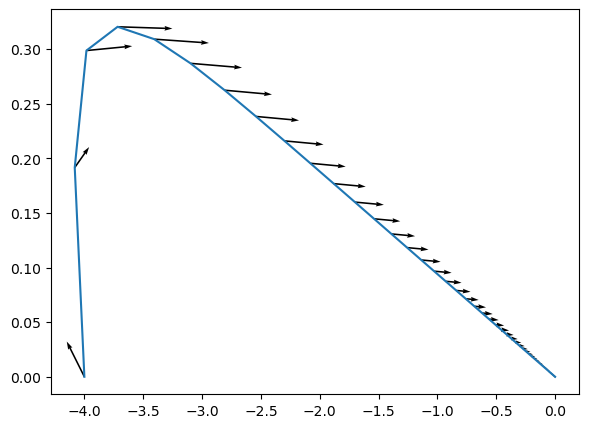

In [23]:


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

### plotting x and y, and computing which time step the state reaches within 10E-1 of goal state

In [ ]:
plt.plot(states[:,0], label="x")
plt.plot(states[:,1], label="y")
plt.xlabel("Time step")
plt.legend()
plt.grid()
k_close = np.where(np.linalg.norm(states - goal_state, 2, axis=1) < 1E-1)[0][0]
print("Time step when within 1E-1 to goal state: %i"%k_close)